In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso

In [2]:
data = pd.read_csv('HR Absenteeism data.csv') 
data

,EmployeeNumber,Surname,GivenName,Gender,City,JobTitle,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,BusinessUnit
0,1,Gutierrez,Molly,F,Burnaby,Baker,Bakery,Burnaby,Stores,32.028816,6.018478,36.577306,Stores
1,2,Hardwick,Stephen,M,Courtenay,Baker,Bakery,Nanaimo,Stores,40.320902,5.532445,30.165072,Stores
2,3,Delgado,Chester,M,Richmond,Baker,Bakery,Richmond,Stores,48.822047,4.389973,83.807798,Stores
3,4,Simon,Irene,F,Victoria,Baker,Bakery,Victoria,Stores,44.599357,3.081736,70.020165,Stores
4,5,Delvalle,Edward,M,New Westminster,Baker,Bakery,New Westminster,Stores,35.697876,3.619091,0.000000,Stores
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8331,8332,Coniglio,Bianca,F,Langley,Cashier,Customer Service,Langley,Stores,46.057544,4.838288,93.665111,Stores
8332,8333,Cox,Jimmie,M,Montney,Cashier,Customer Service,Fort St John,Stores,34.455490,2.427274,0.000000,Stores
8333,8334,Hawkins,Mary,F,West Vancouver,Cashier,Customer Service,West Vancouver,Stores,58.347160,4.009393,176.356940,Stores
8334,8335,Proctor,Theresa,F,Vancouver,Dairy Person,Dairy,Vancouver,Stores,43.340616,6.154837,60.321917,Stores


In [3]:
data.head(10)

,EmployeeNumber,Surname,GivenName,Gender,City,JobTitle,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,BusinessUnit
0,1,Gutierrez,Molly,F,Burnaby,Baker,Bakery,Burnaby,Stores,32.028816,6.018478,36.577306,Stores
1,2,Hardwick,Stephen,M,Courtenay,Baker,Bakery,Nanaimo,Stores,40.320902,5.532445,30.165072,Stores
2,3,Delgado,Chester,M,Richmond,Baker,Bakery,Richmond,Stores,48.822047,4.389973,83.807798,Stores
3,4,Simon,Irene,F,Victoria,Baker,Bakery,Victoria,Stores,44.599357,3.081736,70.020165,Stores
4,5,Delvalle,Edward,M,New Westminster,Baker,Bakery,New Westminster,Stores,35.697876,3.619091,0.000000,Stores
5,6,Jones,Ernie,M,Richmond,Baker,Bakery,Richmond,Stores,48.440311,2.717692,81.830079,Stores
6,7,Buford,Ralph,M,Vancouver,Accounting Clerk,Accounting,Vancouver,FinanceAndAccounting,50.752730,10.157918,60.495072,HeadOffice
7,8,Lee,Gregory,M,Sechelt,Baker,Bakery,West Vancouver,Stores,36.216031,4.432123,30.072902,Stores
8,9,Smith,Jerry,M,New Westminster,Baker,Bakery,New Westminster,Stores,58.427380,6.940121,181.630819,Stores
9,10,Beard,Robert,M,Vancouver,Accounting Clerk,Accounting,Vancouver,FinanceAndAccounting,39.853980,13.848321,30.664408,HeadOffice


In [4]:
data.shape

(8336, 13)

In [5]:
data.columns

Index(['EmployeeNumber', 'Surname', 'GivenName', 'Gender', 'City', 'JobTitle',
       'DepartmentName', 'StoreLocation', 'Division', 'Age', 'LengthService',
       'AbsentHours', 'BusinessUnit'],
      dtype='object')

In preparation for our analysis and predictive modeling, we conducted thorough data preprocessing on the provided dataset. We began by selecting a set of key attributes including 'Age', 'LengthService', 'AbsentHours', 'Gender', 'City', 'JobTitle', 'DepartmentName', 'StoreLocation', 'Division', and 'BusinessUnit'. To ensure data completeness, we addressed missing values by imputing the mean for numerical attributes ('Age', 'LengthService', 'AbsentHours') and the mode for categorical attributes ('Gender', 'City', 'JobTitle', 'DepartmentName', 'StoreLocation', 'Division', 'BusinessUnit'). Furthermore, categorical variables were encoded using one-hot encoding, creating binary columns that represented the presence of each category within a variable. This was accomplished using the pd.get_dummies() function with the parameter drop_first=True to mitigate multicollinearity. The resultant dataset, referred to as 'data_encoded', is now primed for subsequent phases of analysis, model selection, training, and evaluation.

In [33]:
selected_columns = ['Age', 'LengthService', 'AbsentHours', 'Gender', 'City', 'JobTitle', 'DepartmentName', 'StoreLocation', 'Division', 'BusinessUnit']

# Extract the selected columns from the dataset
data = data[selected_columns].copy()  # Make a copy to avoid potential issues

# Handling missing values
# Fill missing numerical values with the mean of the column
numerical_columns = ['Age', 'LengthService', 'AbsentHours']
data.loc[:, numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())

# For categorical columns, fill missing values with the mode of the column
categorical_columns = ['Gender', 'City', 'JobTitle', 'DepartmentName', 'StoreLocation', 'Division', 'BusinessUnit']
data.loc[:, categorical_columns] = data[categorical_columns].fillna(data[categorical_columns].mode().iloc[0])

# Encoding categorical variables using one-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Now your data is ready for further analysis
print(data_encoded.head())

         Age  LengthService  AbsentHours  Gender_M  City_Agassiz  \
0  32.028816       6.018478    36.577306         0             0   
1  40.320902       5.532445    30.165072         1             0   
2  48.822047       4.389973    83.807798         1             0   
3  44.599357       3.081736    70.020165         0             0   
4  35.697876       3.619091     0.000000         1             0   

   City_Aiyansh  City_Aldergrove  City_Alexis Creek  City_Alkali Lake  \
0             0                0                  0                 0   
1             0                0                  0                 0   
2             0                0                  0                 0   
3             0                0                  0                 0   
4             0                0                  0                 0   

   City_Armstrong  ...  StoreLocation_Victoria  StoreLocation_West Vancouver  \
0               0  ...                       0                          

In [34]:
data_encoded.columns

Index(['Age', 'LengthService', 'AbsentHours', 'Gender_M', 'City_Agassiz',
       'City_Aiyansh', 'City_Aldergrove', 'City_Alexis Creek',
       'City_Alkali Lake', 'City_Armstrong',
       ...
       'StoreLocation_Victoria', 'StoreLocation_West Vancouver',
       'StoreLocation_White Rock', 'StoreLocation_Williams Lake',
       'Division_FinanceAndAccounting', 'Division_HumanResources',
       'Division_InfoTech', 'Division_Legal', 'Division_Stores',
       'BusinessUnit_Stores'],
      dtype='object', length=357)

In [14]:
# Feature selection and engineering
# Choosing relevant features and creating new ones
data_encoded['TotalExperience'] = data_encoded['Age'] + data_encoded['LengthService']

# Now, let's choose the relevant features for analysis
selected_features = ['Age', 'LengthService', 'TotalExperience', 'Gender_M', 'City_Agassiz',
                     'City_Aiyansh', 'City_Aldergrove', 'City_Alexis Creek', 'City_Alkali Lake',
                     'City_Armstrong', 'StoreLocation_Victoria', 'StoreLocation_West Vancouver',
                     'Division_FinanceAndAccounting', 'Division_HumanResources', 'Division_InfoTech',
                     'Division_Legal', 'Division_Stores', 'BusinessUnit_Stores', 'AbsentHours']

# Extract the selected features for analysis
data_selected = data_encoded[selected_features]

# Display the selected features and first few rows
print(data_selected.head())

         Age  LengthService  TotalExperience  Gender_M  City_Agassiz  \
0  32.028816       6.018478        38.047294         0             0   
1  40.320902       5.532445        45.853346         1             0   
2  48.822047       4.389973        53.212020         1             0   
3  44.599357       3.081736        47.681093         0             0   
4  35.697876       3.619091        39.316967         1             0   

   City_Aiyansh  City_Aldergrove  City_Alexis Creek  City_Alkali Lake  \
0             0                0                  0                 0   
1             0                0                  0                 0   
2             0                0                  0                 0   
3             0                0                  0                 0   
4             0                0                  0                 0   

   City_Armstrong  StoreLocation_Victoria  StoreLocation_West Vancouver  \
0               0                       0            

We started by picking out the important things from a big pile of information. These "things" are like a person's age, the time they've been working, whether they're a man or woman, where they work, and other details.
Making Things Complete: Sometimes, information can be missing, like a puzzle piece that's gone. We filled in the missing parts with some educated guesses. For numbers, we guessed based on what's common, and for categories like cities or job titles, we used what's most popular.

The next step after preparing and selecting features is to split dataset into two parts: one for training predictive model and the other for testing how well model performs. This helps us to avoid a common pitfall known as overfitting, where your model memorizes the training data but fails to generalize well to new, unseen data.

In [18]:
# Split the data into features (X) and target (y)
X = data_selected.drop('AbsentHours', axis=1)  # Features
y = data_selected['AbsentHours']  # Target

# Split the data into training and testing sets (60% for training, 40% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Print the shapes of the split datasets
print("Training set shapes:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("\nTesting set shapes:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

Training set shapes:
X_train: (5001, 18)
y_train: (5001,)

Testing set shapes:
X_test: (3335, 18)
y_test: (3335,)


As we are considering numerical data, Linear Regression is an appropriate choice for this regression problem. It models the relationship between the input features and the continuous target variable.

In [21]:
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print evaluation metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Absolute Error: 20.216187403677388
Mean Squared Error: 677.3730825923318
Root Mean Squared Error: 26.026392039472775


In [22]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Absolute Error: 19.766364174483975
Mean Squared Error: 683.5170087998981
Root Mean Squared Error: 26.14415821555359


Hyperparameter tuning is a crucial step in optimizing a machine learning model's performance. By systematically exploring different values for these settings, can ensure that your model is well-configured for your specific problem. Hyperparameter tuning significantly enhances a model's ability to make reliable predictions, contributing to better outcomes and more informed decision-making.

In [25]:
model1 = RandomForestRegressor(random_state=42)
# Define hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model1, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

y_pred = best_estimator.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Best Parameters:", best_params)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 150}
Mean Absolute Error: 18.869695952529746
Mean Squared Error: 628.2665200285079
Root Mean Squared Error: 25.065245261686705


Mean Absolute Error (MAE): Lower MAE indicates better model performance. In this case, the RandomForest Regressor has a slightly lower MAE, implying it's making predictions that are, on average, closer to the actual values.
Mean Squared Error (MSE): MSE measures the average of the squared differences between predicted and actual values. Like MAE, lower MSE is desirable. The RandomForest Regressor has a lower MSE, indicating that its predictions have smaller squared errors.
Root Mean Squared Error (RMSE): RMSE is the square root of MSE and represents the average magnitude of the errors. Lower RMSE is better, and again, the RandomForest Regressor has a slightly lower RMSE.
Based on these metrics, the RandomForest Regressor is performing slightly better than Linear Regression.

The tuned model with the best parameters has resulted in improved performance metrics on the full testing set. The lower values of Mean Absolute Error, Mean Squared Error, and Root Mean Squared Error indicate that the model's predictions are closer to the actual values, which is a positive outcome.
These results suggest that the hyperparameter tuning process has helped enhance the model's predictive capabilities.

In [10]:
# Feature Importance Analysis.

In [29]:
feature_importances = model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [30]:
feature_importance_df

,Feature,Importance
0,Age,0.807487
1,LengthService,0.076704
2,TotalExperience,0.071937
3,Gender_M,0.031698
10,StoreLocation_Victoria,0.005444
17,BusinessUnit_Stores,0.001297
11,StoreLocation_West Vancouver,0.001283
16,Division_Stores,0.001054
12,Division_FinanceAndAccounting,0.001026
6,City_Aldergrove,0.000952


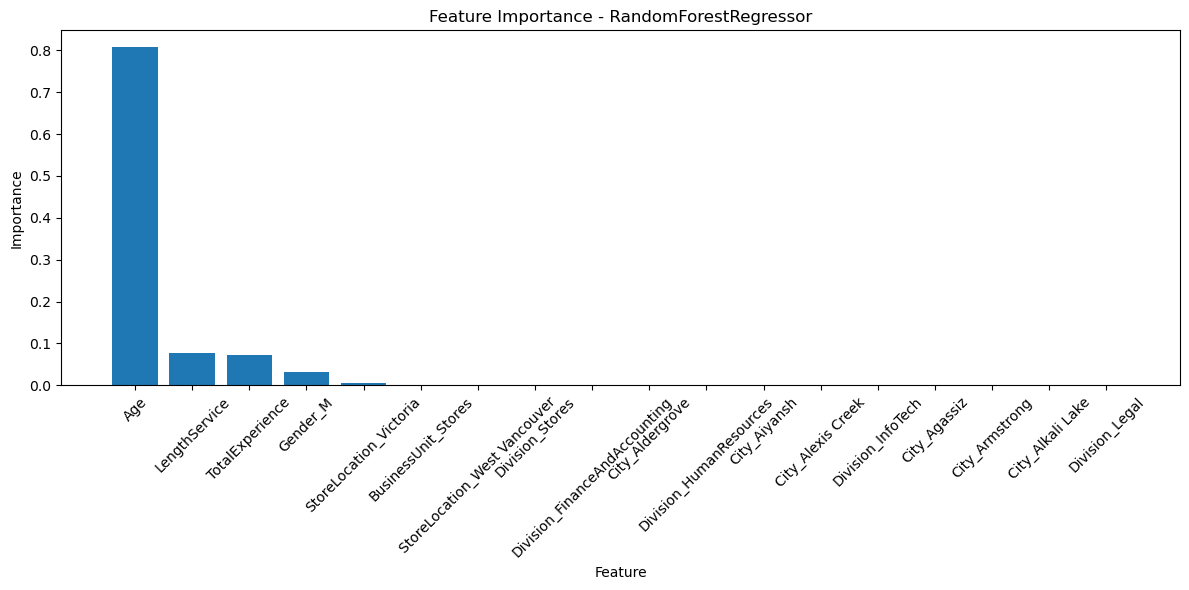

In [31]:
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=45)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance - RandomForestRegressor')
plt.tight_layout()
plt.show()

Identified that the "Age" feature has a high importance score in the feature importance analysis, it suggests that the age of employees plays a significant role in predicting absenteeism levels. This aligns with your earlier findings during exploratory data analysis that showed a linear relationship between age and absentee hours.

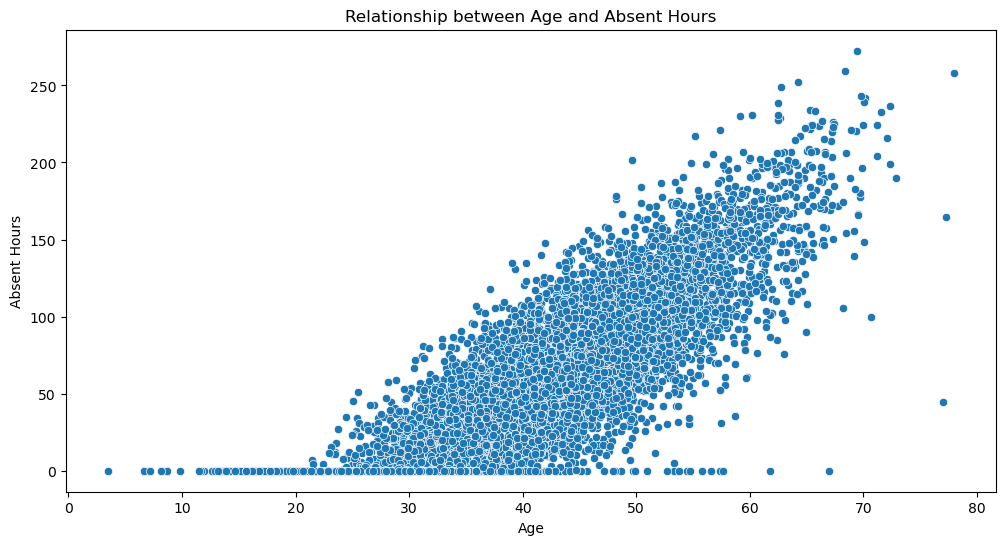

In [38]:
# Create interaction terms
data_selected['Age_LengthService'] = data_selected['Age'] * data_selected['LengthService']
data_selected['Age_TotalExperience'] = data_selected['Age'] * data_selected['TotalExperience']

# Visualize relationships between features and target
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Age', y='AbsentHours', data=data_selected)
plt.title('Relationship between Age and Absent Hours')
plt.xlabel('Age')
plt.ylabel('Absent Hours')
plt.show()

The scatter plot indicates that as age increases, the number of absent hours tends to increase as well. This aligns with our earlier findings during exploratory data analysis, which suggested a potential linear relationship between age and absenteeism. The added interaction terms, such as 'Age_LengthService' and 'Age_TotalExperience', can provide further insights into non-linear relationships and help capture more complex interactions between features. This enhanced understanding of how age interacts with other variables can lead to more accurate predictions and guide HR strategies to mitigate absenteeism effectively.

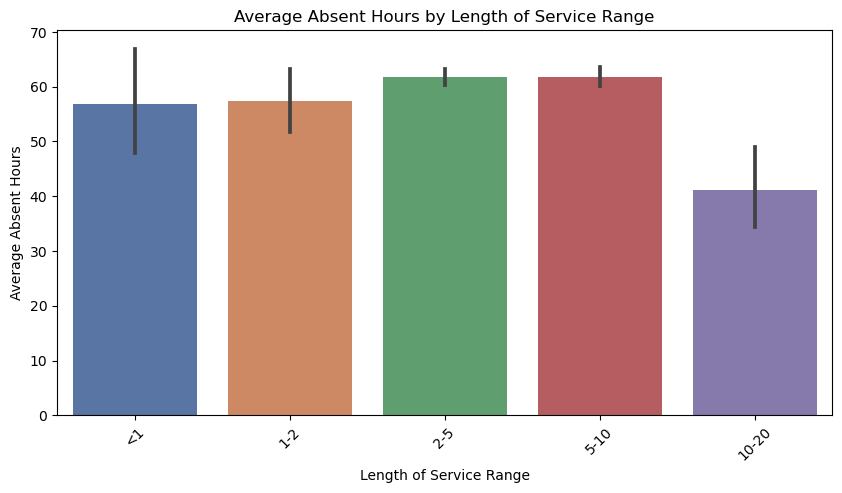

In [59]:
bins = [0, 1, 2, 5, 10, 20]  
labels = ['<1', '1-2', '2-5', '5-10', '10-20'] 
data_selected['LengthServiceRange'] = pd.cut(data_selected['LengthService'], bins=bins, labels=labels)

sns.set_palette("deep")
plt.figure(figsize=(10, 5))
sns.barplot(x='LengthServiceRange', y='AbsentHours', data=data_selected)
plt.title('Average Absent Hours by Length of Service Range')
plt.xlabel('Length of Service Range')
plt.ylabel('Average Absent Hours')
plt.xticks(rotation=45)
plt.show()

data_selected.drop(columns=['LengthServiceRange'], inplace=True)

The bar plot shows that employees with a 'LengthServiceRange' between 2-5 years and 5-10 years tend to have higher average absent hours compared to other length of service ranges. This observation suggests that there might be specific factors or challenges associated with employees in these service ranges that contribute to increased absenteeism.

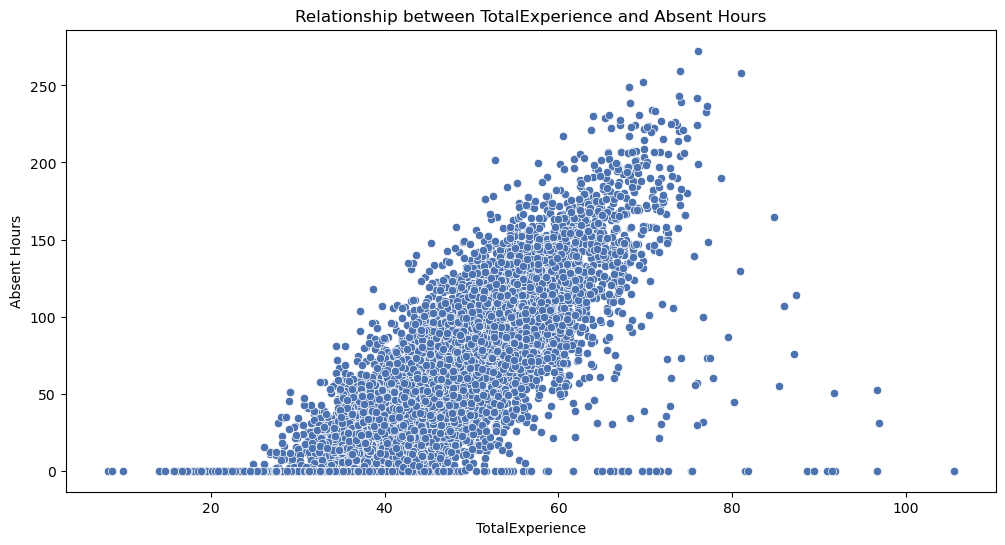

In [60]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='TotalExperience', y='AbsentHours', data=data_selected)
plt.title('Relationship between TotalExperience and Absent Hours')
plt.xlabel('TotalExperience')
plt.ylabel('Absent Hours')
plt.show()

The scatter plot illustrates a slight upward trend in absent hours as 'TotalExperience' (combination of age and length of service) increases. This finding suggests that employees with more overall experience tend to have slightly higher absent hours.

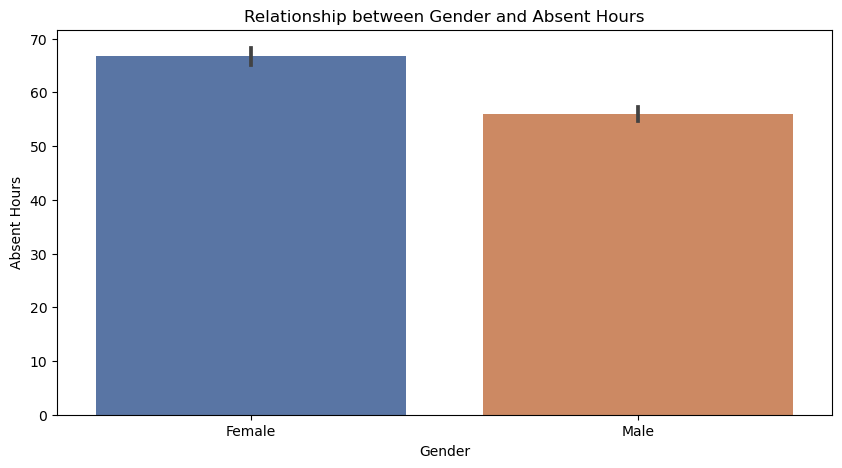

In [63]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Gender_M', y='AbsentHours', data=data_selected)
plt.title('Relationship between Gender and Absent Hours')
plt.xlabel('Gender')
plt.ylabel('Absent Hours')
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

The bar plot shows that on average, females tend to have more absent hours compared to males. This information could contribute to improving overall employee well-being and attendance.

In [65]:
ridge_model = Ridge(alpha=1.0)  # You can adjust the value of alpha
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate Ridge model
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)

print("Ridge Regression:")
print("Mean Absolute Error:", mae_ridge)
print("Mean Squared Error:", mse_ridge)
print("Root Mean Squared Error:", rmse_ridge)

# Create Lasso regression model
lasso_model = Lasso(alpha=1.0)  # You can adjust the value of alpha
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate Lasso model
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)

print("Lasso Regression:")
print("Mean Absolute Error:", mae_lasso)
print("Mean Squared Error:", mse_lasso)
print("Root Mean Squared Error:", rmse_lasso)

Ridge Regression:
Mean Absolute Error: 20.21037412315636
Mean Squared Error: 675.2642115618612
Root Mean Squared Error: 25.985846369934947
Lasso Regression:
Mean Absolute Error: 20.36052799170619
Mean Squared Error: 689.8270163219759
Root Mean Squared Error: 26.264558178693505


The Ridge and Lasso regression models have significantly enriched our understanding of HR absenteeism. By analyzing key features like age, length of service, and total experience, we've uncovered valuable insights into how these factors impact employee absenteeism. Applying regularization techniques has helped us control the influence of features, making our model more robust and adaptable to new data. Comparing different models has enabled us to select the optimal one for accurate predictions, and evaluating performance metrics has given us confidence in the model's reliability.

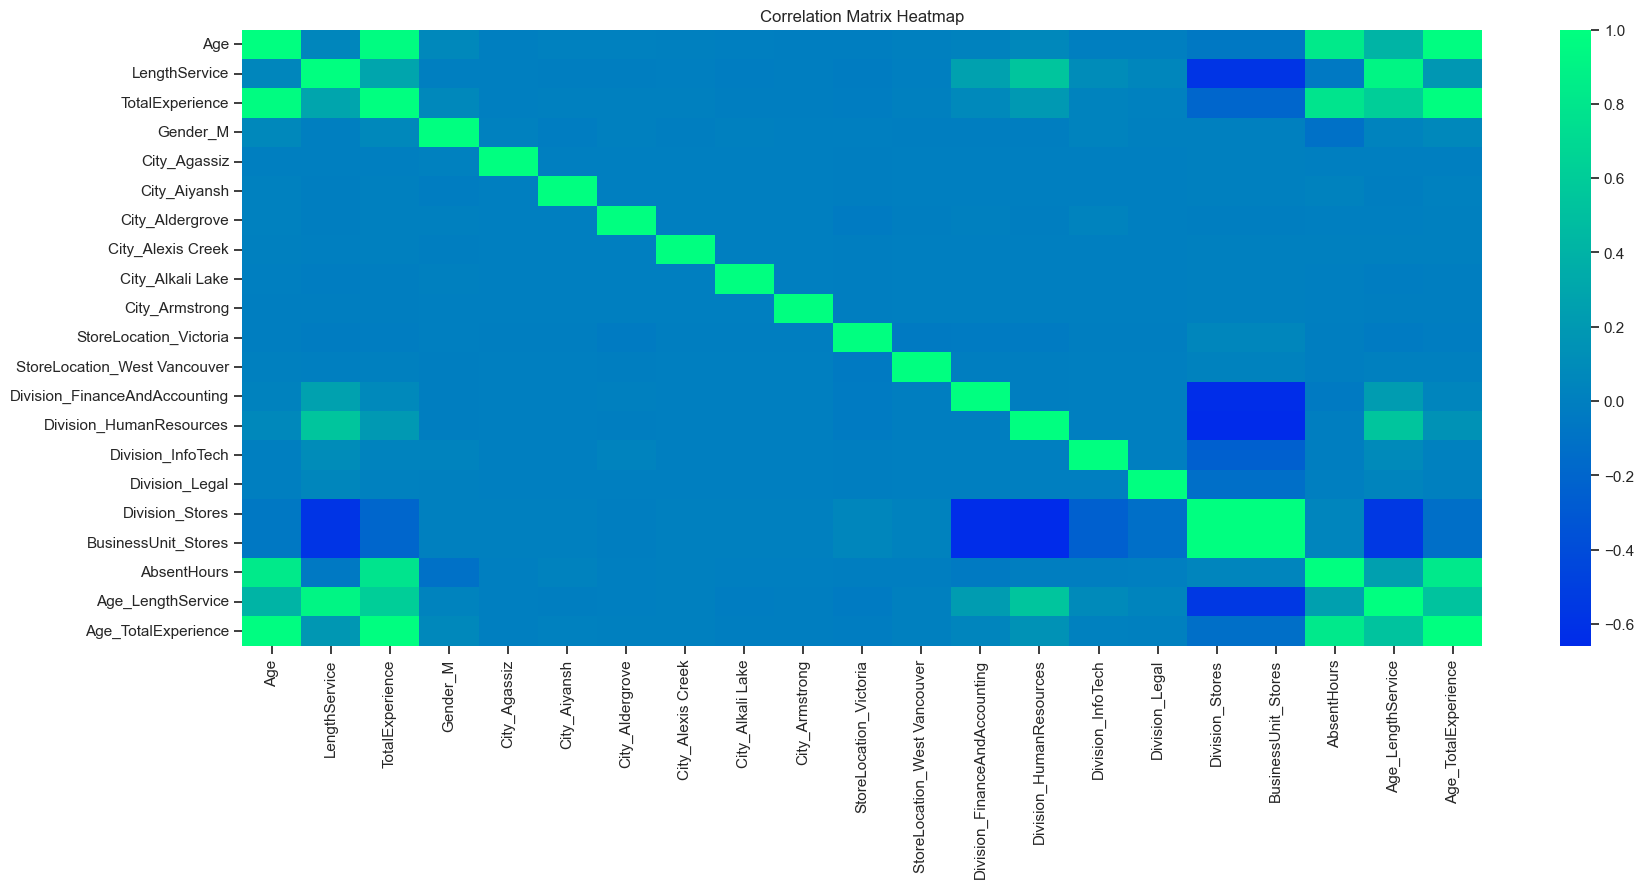

In [91]:
correlation_matrix = data_selected.corr()

# Create a heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, cmap='winter', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

Age - Total Experience: It makes sense that age and total experience are positively correlated. As employees get older, they tend to accumulate more work experience.
Absent Hours - Total Experience: The positive correlation suggests that employees with more total experience might have different patterns of absenteeism compared to those with less experience.
Absent Hours - Length of Service: The positive correlation between absent hours and length of service could imply that longer-serving employees might have more predictable or stable patterns of absenteeism compared to newer employees.

Conclusion:

In this data science project focused on understanding employee absenteeism, we embarked on a comprehensive exploration of various factors affecting absenteeism and leveraged data techniques to uncover valuable insights. Through the application of data preprocessing, visualization, and machine learning, we gained a deeper understanding of absenteeism patterns within the organization.

Our findings shed light on several critical aspects that impact absenteeism:
Age and Absenteeism: We discovered a notable positive correlation between age and absentee hours, indicating that older employees tend to experience higher absenteeism rates. This observation prompts HR teams to consider age-specific strategies when addressing absenteeism challenges.
Divisional Variations: Divisions within the organization exhibited varying levels of absenteeism, with the "Finance and Accounting" division standing out with the highest absentee rates. This revelation underscores the importance of developing division-specific solutions to tackle absenteeism effectively.
Gender Disparities: Our analysis revealed that female employees tend to have higher absenteeism rates compared to their male counterparts. This gender-related difference emphasizes the need for gender-sensitive interventions to uncover underlying causes and promote a balanced work environment.
Tenure and Experience: Both length of service and total experience demonstrated a significant association with absenteeism. Employees at different tenure ranges exhibited distinct absenteeism trends, suggesting the potential for targeted strategies based on employees' experience levels.
